## Task

Протестуйте описані в лекції методи і моделі на датасеті AirPassenger, що міститься на GitHub в папці лекції та містить дані про коливання кількості пасажирів авіаліній із часом. 

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot
%matplotlib inline

In [2]:
data = pd.read_csv('AirPassengers.csv')
data.shape

(144, 2)

In [3]:
data['#Passengers'].isnull().sum()

0

In [4]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [5]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


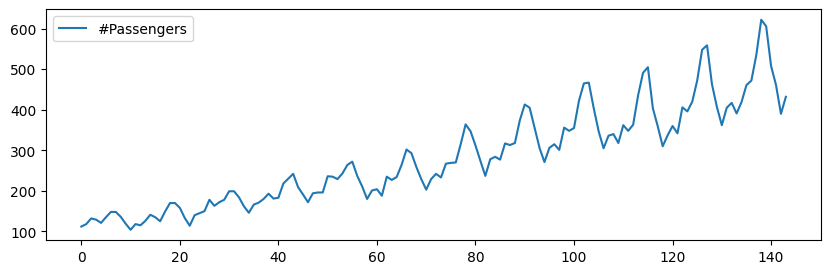

In [6]:
matplotlib.rcParams['figure.figsize'] = [10, 3]
data.plot()
pyplot.show()

In [7]:
acf_value = acf(data['#Passengers'])
pacf_value = pacf(data['#Passengers'], nlags = 3)

In [8]:
acf_value

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376])

In [9]:
pacf_value

array([ 1.        ,  0.95467704, -0.26527732,  0.05546955])

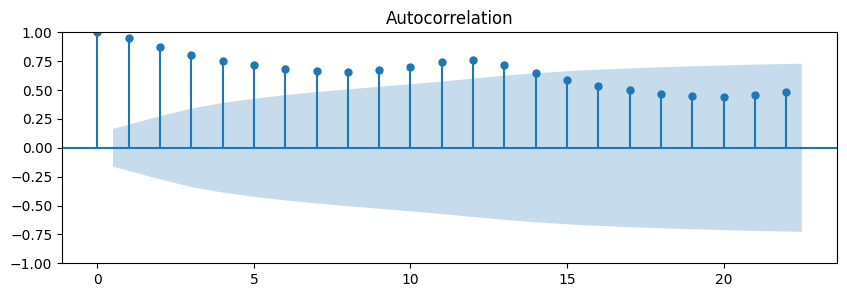

In [10]:
matplotlib.rcParams['figure.figsize'] = [10, 3]
plot_acf(data['#Passengers'])
pyplot.show()

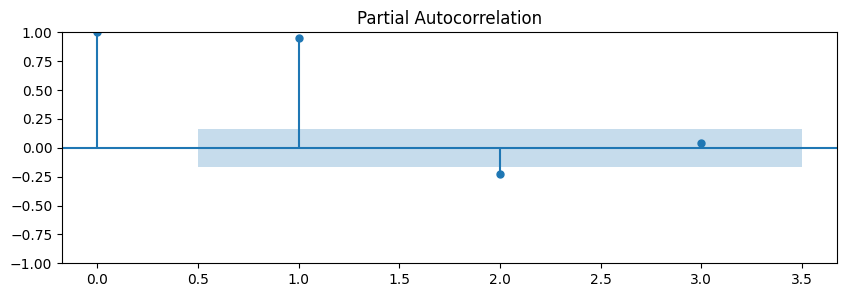

In [11]:
plot_pacf(data['#Passengers'], lags =3)
pyplot.show()


In [12]:
import statsmodels.api as sa

In [13]:
src_data_model = data['#Passengers'][:130]
model = sa.tsa.ARIMA(src_data_model).fit()

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  130
Model:                          ARIMA   Log Likelihood                -790.620
Date:                Tue, 16 May 2023   AIC                           1585.241
Time:                        23:31:30   BIC                           1590.976
Sample:                             0   HQIC                          1587.571
                                - 130                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        260.6308     10.531     24.748      0.000     239.990     281.272
sigma2      1.123e+04   1733.306      6.477      0.000    7829.493    1.46e+04
===================================================================================
Ljung-Box (L1) (Q):                 118.12   Jarque-Bera (JB):                 8.57
Prob(Q):                              0.00   Prob(JB):                         0.01
Heteroskedasticity (H):               1.56   Skew:                             0.61
Prob(H) (two-sided):                  0.15   Kurtosis:                         2.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
pred = model.predict(130,144, typ='levels')

C:\Users\HEWLLET\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: >

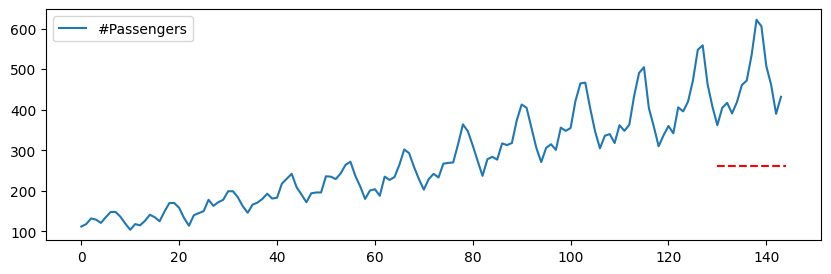

In [16]:
data.plot()
pred.plot(style='r--')

In [17]:
comp = data['#Passengers'][130:144]

In [ ]:
!pip install ml_metrics

In [ ]:
import ml_metrics as metrics

In [ ]:
metrics.rmse(comp, pred)

In [ ]:
metrics.mae(comp, pred)

In [25]:
model = sa.tsa.statespace.SARIMAX(src_data_model, 
                                  seasonal_order=(1,1,1,12)).fit()

In [26]:
pred = model.predict(130,144, typ='levels')

C:\Users\HEWLLET\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: >

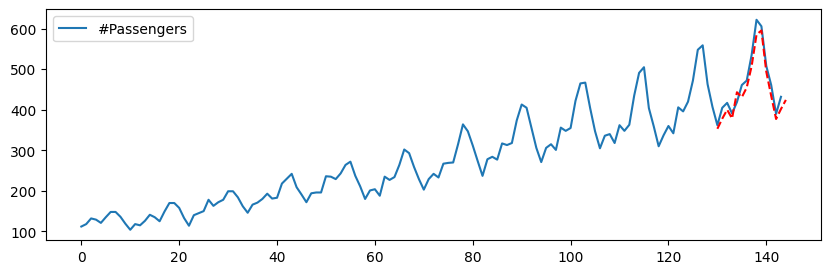

In [27]:
data.plot()
pred.plot(style='r--')

In [ ]:
metrics.rmse(comp, pred)

In [ ]:
metrics.mae(comp, pred)